# Perth Housing Analysis

In [1]:
# Import dependencies 

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import matplotlib.ticker as mticker



In [2]:
# Import CSV 
perth_housing = pd.read_csv('Perth_housing_data.csv')
perth_housing.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


## Clean the data ## 


In [3]:
# Delete irrelevant columsn = garage, address, floor area.
new_perth_housing = perth_housing.drop(['ADDRESS', 'GARAGE', 'FLOOR_AREA', 'NEAREST_SCH_RANK'] , axis =1)

# Remove all null values including
new_perth_housing.dropna(how ='any', inplace = True)

# Convert School distance to meters and convert to integer
new_perth_housing['NEAREST_SCH_DIST'] = (new_perth_housing[['NEAREST_SCH_DIST']] * 1000).astype(int)

#Convert Build Year to Integer 
new_perth_housing['BUILD_YEAR'] = new_perth_housing['BUILD_YEAR'].astype(int)

# Remove post codes which are out of Perth
new_perth_housing = new_perth_housing[new_perth_housing['POSTCODE'] < 6200]

In [4]:
#Check the properties of the dataframe. 
new_perth_housing.shape

(30378, 15)

In [5]:
# Change datatype of DATE SOLD column to string to remove '/r' 
new_perth_housing[['DATE_SOLD']] = new_perth_housing[['DATE_SOLD']].astype('string')
new_perth_housing['DATE_SOLD'] = new_perth_housing['DATE_SOLD'].str[:7]

#Split Month and Year 
new_perth_housing['DATE_SOLD'] = pd.to_datetime(new_perth_housing['DATE_SOLD'])

# Add clean data to new frame
clean_perth_housing = new_perth_housing

/var/folders/yh/d9vyd51x27137p_k6yk1h2300000gn/T/ipykernel_5868/868040009.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_perth_housing['DATE_SOLD'] = pd.to_datetime(new_perth_housing['DATE_SOLD'])


In [6]:
clean_perth_housing.head(10)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST
0,South Lake,565000,4,2,600,2003,18300,Cockburn Central Station,1800,2018-09-01,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,828
1,Wandi,365000,3,2,351,2013,26900,Kwinana Station,4900,2019-02-01,6167,-32.193470,115.859554,ATWELL COLLEGE,5524
2,Camillo,287000,3,1,719,1979,22600,Challis Station,1900,2015-06-01,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1649
3,Bellevue,255000,2,1,651,1953,17900,Midland Station,3600,2018-07-01,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1571
4,Lockridge,325000,4,1,466,1998,11200,Bassendean Station,2000,2016-11-01,6054,-31.885790,115.947780,KIARA COLLEGE,1514
5,Mount Richon,409000,4,2,759,1991,27300,Armadale Station,1000,2013-03-01,6112,-32.153801,116.023658,ARMADALE SENIOR HIGH SCHOOL,1227
6,Hilbert,400000,3,2,386,2014,28200,Armadale Station,3700,2016-05-01,6112,-32.179978,115.988647,DALE CHRISTIAN SCHOOL,2485
7,Waikiki,370000,4,2,468,2013,41700,Warnbro Station,1100,2019-03-01,6169,-32.317662,115.761968,SOUTH COAST BAPTIST COLLEGE,491
8,Hamersley,565000,4,2,875,1983,12100,Warwick Station,2500,2020-06-01,6022,-31.847760,115.822700,WARWICK SENIOR HIGH SCHOOL,1221
9,Bayswater,685000,3,2,552,1999,5900,Bayswater Station,508,2019-10-01,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,936


In [7]:
# Count the number of house sales in a particular year. Results in descending order.

clean_perth_housing['Sale_Year'] = pd.to_datetime(clean_perth_housing['DATE_SOLD']).dt.year
yearly_sales = clean_perth_housing['Sale_Year'].value_counts()

In [8]:
print(yearly_sales)

Sale_Year
2018    5101
2020    4799
2019    4761
2017    4460
2016    3584
2015    2804
2014    1661
2013     996
2012     469
2011     300
2010     231
2009     223
2007     136
2008     132
2006     124
2005     106
2003      77
2002      69
2004      67
2001      47
1998      40
2000      35
1999      29
1997      22
1995      19
1994      18
1996      16
1992      11
1991      11
1993      10
1989       8
1988       8
1990       4
Name: count, dtype: int64


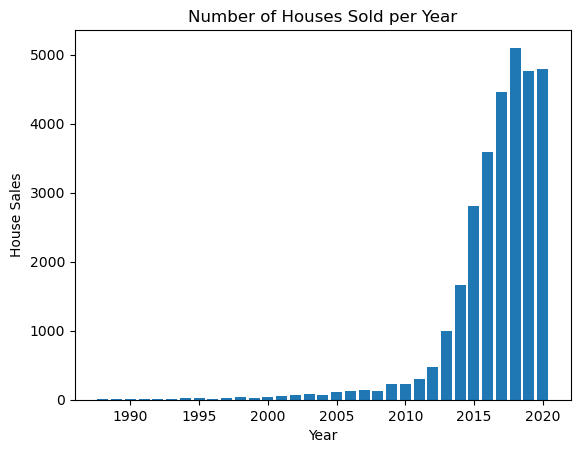

In [9]:
# Create a bar graph
plt.bar(yearly_sales.index, yearly_sales.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('House Sales')
plt.title('Number of Houses Sold per Year')

# Show the graph
plt.savefig('plot1.png')

plt.show()



Sales_By_Month
10    2934
11    2889
8     2679
7     2623
9     2595
3     2565
5     2541
6     2501
12    2477
4     2330
2     2202
1     2042
Name: count, dtype: int64


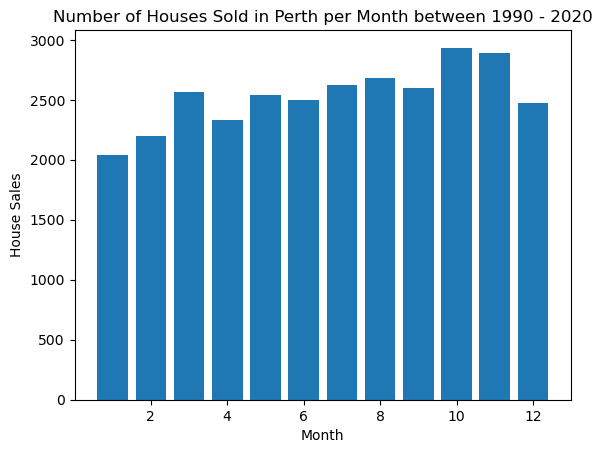

In [10]:
# Which month and has the best sales?

clean_perth_housing['Sales_By_Month'] = pd.to_datetime(clean_perth_housing['DATE_SOLD']).dt.month
monthly_sales = clean_perth_housing['Sales_By_Month'].value_counts()

print(monthly_sales)

plt.bar(monthly_sales.index, monthly_sales.values)

plt.xlabel('Month')
plt.ylabel('House Sales')
plt.title('Number of Houses Sold in Perth per Month between 1990 - 2020')

plt.savefig('plot2.png')

plt.show()

CBD_DIST
12600    168
12500    164
14900    160
12700    151
12200    150
        ... 
2137       1
793        1
956        1
57700      1
58100      1
Name: count, Length: 593, dtype: int64


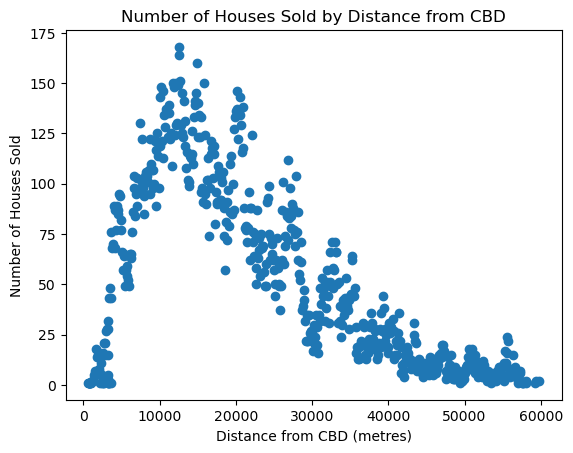

In [11]:
# Number of Houses Sold per Postcode

Sales_by_Dist_from_CBD = clean_perth_housing['CBD_DIST'].value_counts()

print(Sales_by_Dist_from_CBD)

plt.scatter(Sales_by_Dist_from_CBD.index, Sales_by_Dist_from_CBD.values)

plt.xlabel('Distance from CBD (metres)')
plt.ylabel('Number of Houses Sold')
plt.title('Number of Houses Sold by Distance from CBD')

plt.savefig('plot3.png')

plt.show()

In [12]:
# Average House price per Suburb

Average_House_Price = pd.DataFrame(clean_perth_housing.groupby(['SUBURB'])['PRICE'].mean().astype(int))

sorted_prices = Average_House_Price['PRICE'].sort_values(ascending=False)


print(sorted_prices)

#print(Average_House_Price)

#plt.scatter(Average_House_Price.index, Average_House_Price.values)

#plt.xlabel('Distance from CBD (metres)')
#plt.ylabel('Price ($ m)')
#plt.title('Average House Price by Distance from CBD')

#plt.savefig('plot4.png')

#plt.show()

SUBURB
Dalkeith               1961921
Peppermint Grove       1771982
Cottesloe              1646283
City Beach             1644756
Nedlands               1639098
                        ...   
Medina                  270912
Haynes                  265126
Armadale                249043
Kwinana Town Centre     185598
Kwinana Beach           170000
Name: PRICE, Length: 317, dtype: int64


In [13]:
Average_House_Price = pd.DataFrame(clean_perth_housing.groupby(['SUBURB','Sale_Year'])['PRICE'].mean().astype(int))

In [14]:
top_10_prices = []
bottom_10_prices = []

Average_House_Price_2016 = pd.DataFrame(clean_perth_housing[clean_perth_housing['Sale_Year'] == 2016].groupby(['SUBURB'])['PRICE'].mean().astype(int))

avg_sorted_2016 = Average_House_Price_2016['PRICE'].sort_values(ascending=False)

result = avg_sorted_2016[:10].mean().astype(int)

top_10_prices.append(result)

top_10_prices

[1471682]

In [15]:
result = avg_sorted_2016[-10:].mean().astype(int)

bottom_10_prices.append(result)

bottom_10_prices

[302751]

In [16]:
Average_House_Price_2017 = pd.DataFrame(clean_perth_housing[clean_perth_housing['Sale_Year'] == 2017].groupby(['SUBURB'])['PRICE'].mean().astype(int))

avg_sorted_2017 = Average_House_Price_2017['PRICE'].sort_values(ascending=False)

result1 = avg_sorted_2017[:10].mean().astype(int)
top_10_prices.append(result1)

result = avg_sorted_2017[-10:].mean().astype(int)
bottom_10_prices.append(result)


bottom_10_prices

[302751, 274428]

In [17]:
top_10_prices

[1471682, 1722613]

In [18]:
Average_House_Price_2018 = pd.DataFrame(clean_perth_housing[clean_perth_housing['Sale_Year'] == 2018].groupby(['SUBURB'])['PRICE'].mean().astype(int))

avg_sorted_2018 = Average_House_Price_2018['PRICE'].sort_values(ascending=False)

result1 = avg_sorted_2018[:10].mean().astype(int)
top_10_prices.append(result1)

top_10_prices

[1471682, 1722613, 1671564]

In [19]:
result = avg_sorted_2018[-10:].mean().astype(int)
bottom_10_prices.append(result)


bottom_10_prices

[302751, 274428, 259938]

In [20]:
Average_House_Price_2019 = pd.DataFrame(clean_perth_housing[clean_perth_housing['Sale_Year'] == 2019].groupby(['SUBURB'])['PRICE'].mean().astype(int))

avg_sorted_2019 = Average_House_Price_2019['PRICE'].sort_values(ascending=False)

result1 = avg_sorted_2019[:10].mean().astype(int)
top_10_prices.append(result1)

top_10_prices

[1471682, 1722613, 1671564, 1524207]

In [21]:
result = avg_sorted_2019[-10:].mean().astype(int)
bottom_10_prices.append(result)


bottom_10_prices

[302751, 274428, 259938, 245973]

In [22]:
Average_House_Price_2020 = pd.DataFrame(clean_perth_housing[clean_perth_housing['Sale_Year'] == 2020].groupby(['SUBURB'])['PRICE'].mean().astype(int))

avg_sorted_2020 = Average_House_Price_2020['PRICE'].sort_values(ascending=False)

result1 = avg_sorted_2020[:10].mean().astype(int)
top_10_prices.append(result1)

top_10_prices

[1471682, 1722613, 1671564, 1524207, 1609982]

In [23]:
result = avg_sorted_2020[-10:].mean().astype(int)
bottom_10_prices.append(result)


bottom_10_prices

[302751, 274428, 259938, 245973, 255500]

In [24]:
year = [2016, 2017, 2018, 2019, 2020]

In [25]:
avg_prices = pd.DataFrame({'Year': year, 'Top 10 Suburbs Average Price': top_10_prices, 'Bottom 10 Suburbs Average Price': bottom_10_prices})

print(avg_prices)

   Year  Top 10 Suburbs Average Price  Bottom 10 Suburbs Average Price
0  2016                       1471682                           302751
1  2017                       1722613                           274428
2  2018                       1671564                           259938
3  2019                       1524207                           245973
4  2020                       1609982                           255500


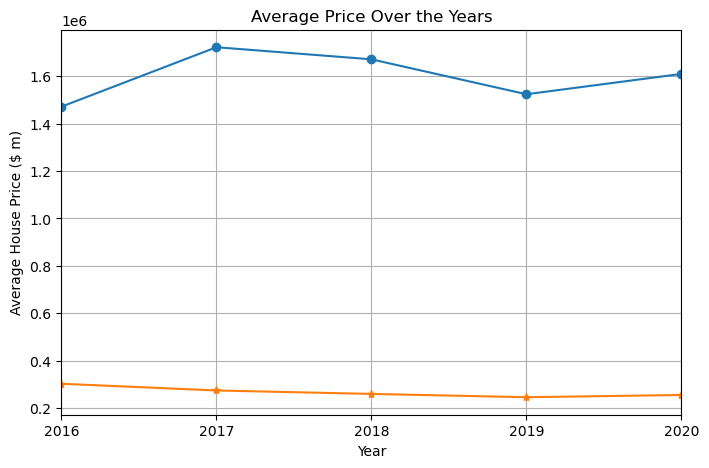

<Figure size 640x480 with 0 Axes>

In [26]:
df = pd.DataFrame(avg_prices)

# Create a line plot
plt.figure(figsize=(8, 5))  # Adjust the figure size if needed

plt.plot(df['Year'], df['Top 10 Suburbs Average Price'], marker='o', linestyle='-')
plt.plot(df['Year'], df['Bottom 10 Suburbs Average Price'], marker='*', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average House Price ($ m)')
plt.title('Average Price Over the Years')
plt.legend

# Show the plot
plt.grid()
#formatter = mticker.StrMethodFormatter('{x:.0f}')
#plt.gca().xaxis.set_major_formatter(formatter)
plt.xlim(2016, 2020)
plt.xticks(range(2016, 2021, 1))
plt.show()

plt.savefig('plot5.png')